# Python Course

## Course goals

- The audience could implement a specific feature in a elegant and clean way.
- The audience could use the right tools in order to make life easier and happier.

## Overview

In Python, variables are simply names that refer to objects. Variables do not need to be declared before they are assigned and they can even change type in the middle of a program. Like other dynamic languages, all type-checking is performed at run-time by an interpreter instead of during a separate compilation step.

## Lexical analysis

Although it's easy to start writing Python code with merely basic syntax knowledge, I'd like to start our course from the lexical analysis of Python to make sure we didn't miss anything important.

### Encoding declarations

```python
# -*- coding: <encoding-name> -*-
```

If a comment in the first or second line of the Python script matches the regular expression `coding[=:]\s*([-\w.]+)`, this comment is processed as an encoding declaration; the first group of this expression names the encoding of the source code file. The encoding declaration must appear on a line of its own. If it is the second line, the first line must also be a comment-only line.

UTF-8 is the default source encoding for Python 3, just as ASCII was the default for Python 2 (starting with 2.5).

The default encoding behavior is defined in the function `decoding_fgets` which is defined in the Parser/tokenizer.c file. This function was added in the commit below:

- Patch #534304: Implement phase 1 of PEP 263. https://github.com/python/cpython/commit/00f1e3f5a54adb0a7159a446edeca2e36da4092e#diff-30b8266a4285de981f8b1b82a8cc6231

Before Python 2.5, there is only `fgets` available to read lines from source file.

- Mass checkin of universal newline support. https://github.com/python/cpython/commit/7b8c7546ebc1fc3688ef95768fa8b82f0f205490#diff-30b8266a4285de981f8b1b82a8cc6231
```c
char *
Py_UniversalNewlineFgets(char *buf, int n, FILE *stream, PyObject *fobj)
{
	return fgets(buf, n, stream);
}
```

### Indentation

In Python 2, one table is an equivalence of eight spaces. In Python 3, can not use a mixture of tabs and spaces in indentation.

Make tabs always 8 spaces wide -- it's more portable. https://github.com/python/cpython/commit/4fe872988b3dd9edf004160c44076df839f14516#diff-30b8266a4285de981f8b1b82a8cc6231

In [4]:
for i in range(3):
        print(i) # 8 spaces this line.
	print(i) # 1 tab this line.

0
0
1
1
2
2


***Never ever use a mixture of tabs and spaces.***

### Reserved classes of identifiers

`_*`
    
Not imported by `from module import *`. The special identifier `_` is used in the interactive interpreter to store the result of the last evaluation; it is stored in the `__builtin__` module. When not in interactive mode, `_` has no special meaning and is not defined.

`__*__`

System-defined names. These names are defined by the interpreter and its implementation (including the standard library). Current system names are discussed in the [Special method names](https://docs.python.org/2/reference/datamodel.html#specialnames) section and elsewhere. More will likely be defined in future versions of Python. Any use of `__*__` names, in any context, that does not follow explicitly documented use, is subject to breakage without warning.

`__*`

Class-private names. Names in this category, when used within the context of a class definition, are re-written to use a mangled form to help avoid name clashes between “private” attributes of base and derived classes.

## Data Types

In this section, I will introduce some basic Python types which come from the `types` module.

In [1]:
import types
dir(types)

['BooleanType',
 'BufferType',
 'BuiltinFunctionType',
 'BuiltinMethodType',
 'ClassType',
 'CodeType',
 'ComplexType',
 'DictProxyType',
 'DictType',
 'DictionaryType',
 'EllipsisType',
 'FileType',
 'FloatType',
 'FrameType',
 'FunctionType',
 'GeneratorType',
 'GetSetDescriptorType',
 'InstanceType',
 'IntType',
 'LambdaType',
 'ListType',
 'LongType',
 'MemberDescriptorType',
 'MethodType',
 'ModuleType',
 'NoneType',
 'NotImplementedType',
 'ObjectType',
 'SliceType',
 'StringType',
 'StringTypes',
 'TracebackType',
 'TupleType',
 'TypeType',
 'UnboundMethodType',
 'UnicodeType',
 'XRangeType',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__']

In order to discuss them in a proper way, we will classify them into several groups:

- Numeric Types
- Sequence Types
- Set Types and Mapping Types
- Other types

### Numeric Types

#### Built-in numeric types

There are some numeric types which can be defined as a literal. Please note that `bool` type is a numeric type.

In [17]:
# built-in numeric types
{
    type(True): True,
    type(1): 1,
    type(1.0): 1.0,
    type(1+1j): 1+1j,
    type(1L): 1L,
}

{bool: True, complex: (1+1j), float: 1.0, int: 1, long: 1L}

In [19]:
issubclass(bool, int)

True

#### Other numeric types

There are some other numeric types in Python Standard Library, for example, Decimal and Fraction.

Besides the regular use cases of the numbers, there are some singular cases to which we need to pay attention.

In [15]:
# other numeric types
from decimal import Decimal
from fractions import Fraction

Fraction(2, 3), Decimal('1.000000001')

(Fraction(2, 3), Decimal('1.000000001'))

#### Number tricks

##### boolean

There are three types of integers:
- Integers (int or long)
- Booleans

[PEP 285 -- Adding a bool type](https://www.python.org/dev/peps/pep-0285/)

This PEP proposes the introduction of a new built-in type, bool, with two constants, False and True.

The bool type would be a straightforward subtype (in C) of the int type, and the values False and True would behave like 0 and 1 in most respects (for example, False==0 and True==1 would be true) except repr() and str().

All built-in operations that conceptually return a Boolean result will be changed to return False or True instead of 0 or 1; for example, comparisons, the "not" operator, and predicates like isinstance().

In [26]:
issubclass(bool, int), str(True), repr(True)

(True, 'True', 'True')

In [19]:
True == 1, True & 2, True | 2, True << 2, True >> 1, ~True, ~False, -True

(True, 0, 3, 4, 0, -2, -1, -1)

In [14]:
True + 2, True - True, True * 2, 2 / True, True ** True

(3, 0, 2, 2, 1)

In [20]:
import math
math.cos(True)

0.5403023058681398

Because True is equal to 1 and False is equal to 0, there is a tricky scenario when you use bool as the key of a dictionary.

In [22]:
{True:'True', 1:'One'}

{True: 'One'}

In Python, bools are not 'textbook' bools which do not support arithmetic operations. Please keep that in mind.

##### float

Almost all platforms map Python floats to IEEE-754 "double precision". In that way, the represent of the floats will encounter the precision issue.

https://docs.python.org/2/tutorial/floatingpoint.html

In [15]:
from fractions import Fraction
print(0.1 + 0.2, Fraction(0.1 + 0.2))

(0.30000000000000004, Fraction(1351079888211149, 4503599627370496))


By using Decimal, which is a fixed point, the precision issue can be solved.

In [1]:
from decimal import Decimal
from fractions import Fraction
# Don't use float number to construct the Decimal.
Decimal("0.1") + Decimal("0.2"), Fraction(Decimal("0.1") + Decimal("0.2"))

(Decimal('0.3'), Fraction(3, 10))

Although Decimal is a handy class to use, but it seems that in some cases Decimal cannot be used directly.

In [18]:
import numbers
from decimal import Decimal

issubclass(Decimal, numbers.Real), issubclass(Decimal, numbers.Number)

(False, True)

In [17]:
import json
from decimal import Decimal

json.dumps({1: Decimal("1")})

TypeError: Decimal('1') is not JSON serializable

As a part of IEEE-754, there are `nan` and `inf`. Although `nan` may be not very useful in our real world, but the `inf` is still a useful concept.

In [25]:
inf = float('inf')
inf + inf, inf - inf, inf * inf, inf / inf, -inf

(inf, nan, inf, nan, -inf)

### Sequence Types

#### Mutable sequences vs. Immutable sequences

An object of an immutable sequence type cannot change once it is created.

Mutable sequences can be changed after they are created.

In [5]:
import collections

print "name\tmutable?"
for t in [str, list, tuple]:
    print "%s\t%s" % (t.__name__, issubclass(t, collections.MutableSequence))

name	mutable?
str	False
list	True
tuple	False


 If the object contains references to other objects, these other objects may be mutable and may be changed; however, the collection of objects directly referenced by an immutable object cannot change.

In [8]:
a = (1, [], 'Hello')
a[1].append(2) # The refered object can be changed.
print(a)
a[1] = [] # The reference itself in the immutable sequence can not be changed.

(1, [2], 'Hello')


TypeError: 'tuple' object does not support item assignment

#### List Comprehensions

In [24]:
# Variable leaking in Python 2
l = [x for x in range(10)]
print(l)
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
9


#### Slicing

`a[i:j:k]` selects all items of a with index x where x = i + n*k, n >= 0 and i <= x < j.

To evaluate the expression seq[start:stop:step], Python calls seq.`__getitem__`(slice(start, stop, step)).

Slice objects are used to represent slices when extended slice syntax is used. This is a slice using two colons, or multiple slices or ellipses separated by commas, e.g., a[i:j:step], a[i:j, k:l], or a[..., i:j]. They are also created by the built-in `slice()` function.



In [36]:
l = range(10)
s = slice(1, 100, 2)
print(l[s])
print(s.indices(len(l)))

[1, 3, 5, 7, 9]
(1, 10, 2)


In [44]:
class L(object):
    def __getitem__(self, index):
        print(index)

l = L()
l[1:2]
l[1:2, 3:4]
l[1, ..., -1]

slice(1, 2, None)
(slice(1, 2, None), slice(3, 4, None))
(1, Ellipsis, -1)


#### Sequence tricks

Some operations on the sequences have very tricky. There are some misusing cases below.

In [55]:
# create a two dimensions matrix
m = [[0] * 2] * 2
m[0][0] = 1
print(m)

[[1, 0], [1, 0]]


When performing an augmented assignment, if the object is mutable, it will be changed in place.

In [82]:
# augmented assignment
m = (1, 2, [3, 4])
m[2].append(5)
print(m)
try:
    m[2] += [6]
except:
    import traceback
    print(traceback.format_exc())
print(m)

(1, 2, [3, 4, 5])
Traceback (most recent call last):
  File "<ipython-input-82-1feba7fbae78>", line 6, in <module>
    m[2] += [6]
TypeError: 'tuple' object does not support item assignment

(1, 2, [3, 4, 5, 6])


Let's see how to fix them.

In [75]:
def create_matrix(dimensions):
    """
    create the matrix recursively.
    
    Question: how many times the create_matrix function will be called if I want create a (x, y, z, r, p, q) matrix?
    """
    if not dimensions:
        return [] # empty matrix
    if len(dimensions) == 1:
        return [0] * dimensions[0] # new list created and returned.
    return [create_matrix(dimensions[1:]) for _ in range(dimensions[0])] # repeatedly create the lower dimensions.

m = create_matrix((2, 2))
m[0][0] = 1
print(m)

[[1, 0], [0, 0]]


In [83]:
# Never place any mutable object in a immutable container.
# Instead of modifying the immutable object, please re-create a new one.
m = (1, 2, (3, 4))
m = m[:2] + (m[2] + (5,),)
print(m)
m = m[:2] + (m[2] + (6,),)
print(m)

(1, 2, (3, 4, 5))
(1, 2, (3, 4, 5, 6))


### Set types and Mappings

Set types and mappings are implemented using hash tables.

Hash Table Example: Hash collision resolved by open addressing with linear probing 

![open addressing with linear probing](../../images/Hash_table_open_addressing.png)

Collision resolution in Python: Open addressing with non-linear probing

https://github.com/python/cpython/blob/2.7/Objects/dictobject.c#L33-L135

#### hashable
An object is hashable if it has a hash value which never changes during its lifetime (it needs a `__hash__()` method), and can be compared to other objects (it needs an `__eq__()` or `__cmp__()` method). <em style="color: blue">Hashable objects which compare equal must have the same hash value.</em>

<em style="color: blue">Hashability makes an object usable as a dictionary key and a set member</em>, because these data structures use the hash value internally.

<em style="color: blue">All of Python’s immutable built-in objects are hashable</em>, while no mutable containers (such as lists or dictionaries) are. <em style="color: blue">Objects which are instances of user-defined classes are hashable by default; they all compare unequal (except with themselves), and their hash value is derived from their id().</em>

https://docs.python.org/2/glossary.html#term-hashable

In [3]:
hash(1), hash(1.0)

(1, 1)

In [4]:
{(1, 1, 2): 3}

{(1, 1, 2): 3}

In [5]:
{{1, 1, 2}: 3}

TypeError: unhashable type: 'set'

In [11]:
class A(object): pass

a1 = A()
a2 = A()
print({a1: 1, a2:2, a1: 3})
print(hex(hash(a1)), hex(hash(a2)))
print(hex(id(a1)), hex(id(a2)))

{<__main__.A object at 0x1089ee410>: 2, <__main__.A object at 0x1084759d0>: 3}
('0x1084759d', '0x1089ee41')
('0x1084759d0', '0x1089ee410')


#### Time Complexity
https://wiki.python.org/moin/TimeComplexity

### Callable types

These are the types to which the function call operation can be applied:
- User-defined functions
- User-defined methods in Python 2 & Instance methods in Python 3
- Generator functions
- Coroutine functions & Asynchronous generator functions (Python 3 only)
- Built-in functions & Built-in methods
- Classes (new style classes & classic classes)
- Class instances

In [12]:
def hi():
    return 'Hello world!'

In [21]:
class Dog(object):
    def bark(self):
        return 'woof'

In [16]:
def infinite_number_counter():
    i = 0
    while True:
        yield i
        i += 1

c = infinite_number_counter()
next(c), next(c), next(c), next(c)

(0, 1, 2, 3)

In [19]:
l = range(5)
print(l)
print(len(l))
l.append(5)
print(l)

[0, 1, 2, 3, 4]
5
[0, 1, 2, 3, 4, 5]


In [22]:
d = Dog()

In [24]:
class A(object):
    def __call__(self, *args, **kwargs):
        print(args, kwargs)

a = A()
a(1, foo='bar')

((1,), {'foo': 'bar'})


# References
<div class="reference">
!["fluent python"](../../references/fluent-python.jpg "Fluent Python")
!["python language reference"](../../references/python-language-reference.jpg "Python Language Reference")
</div>

# Videos

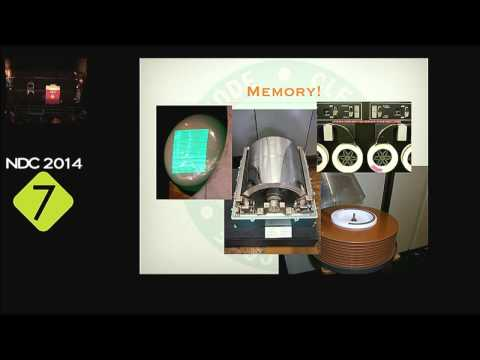

In [1]:
from IPython.display import YouTubeVideo
# This is a very informative speech, and it worth your watching repeatly.
YouTubeVideo('7Zlp9rKHGD4')

# Links
[The History of Python - A series of articles on the history of the Python programming language and its community.](http://python-history.blogspot.sg/) by Guido van Rossum

In [27]:
from decimal import Decimal
True == 1 == 1+0j == 1.0 == Decimal("1")

True

In [6]:
from decimal import Decimal
{True: 1, 1: 2, 1 + 0j: 3, 1.0: 4, Decimal(1): 5}

{True: 5}

- global https://git.garena.com/beepos/pos_python_server/merge_requests/906/diffs#f5cacdfe36190a654800eb8009177e26d030db7e_3_26
- Why should we NOT use sys.setdefaultencoding(“utf-8”) in a py script?
 https://stackoverflow.com/questions/3828723/why-should-we-not-use-sys-setdefaultencodingutf-8-in-a-py-script

Python compare. is, ==, bool